In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Get the current notebook's directory
notebook_dir = os.getcwd()  # current working directory

# Assume 'ml' folder is in the repo root, one level up from notebooks/
repo_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add repo root to Python path if not already there
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
from data.load_data import load_synthetic_regression
X_lin, y_lin, _ = load_synthetic_regression(n_samples=200, n_features=1, noise=10, random_state=42, bias=0)

# Non-linear dataset
X_quad = np.linspace(-5, 5, 200).reshape(-1, 1)
y_quad = X_quad.flatten()**2 + np.random.randn(200) * 2

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2)
X_train_quad, X_test_quad, y_train_quad, y_test_quad = train_test_split(X_quad, y_quad, test_size=0.2)

In [3]:
from ml.models.decisionTree_regressor import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_lin, y_train_lin)
y_pred_lin = tree.predict(X_test_lin)

tree_quad = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_quad, y_train_quad)
y_pred_quad = tree.predict(X_test_quad)

In [4]:
from ml.evaluation import mean_squared_error, r2_score
print("Linear dataset MSE:", mean_squared_error(y_test_lin, y_pred_lin))
print("Linear dataset R2:", r2_score(y_test_lin, y_pred_lin))

print("Quadratic dataset MSE:", mean_squared_error(y_test_quad, y_pred_quad))
print("Quadratic dataset R2:", r2_score(y_test_quad, y_pred_quad))


Linear dataset MSE: 494.54965579824295
Linear dataset R2: 0.9408345689735109
Quadratic dataset MSE: 11.311169071619897
Quadratic dataset R2: 0.8631781653675736


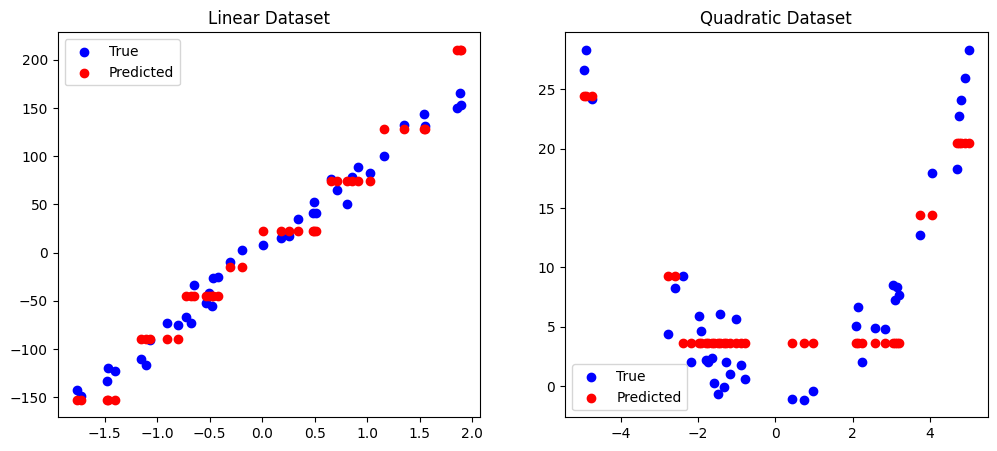

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_test_lin, y_test_lin, color='blue', label='True')
plt.scatter(X_test_lin, y_pred_lin, color='red', label='Predicted')
plt.title("Linear Dataset")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_test_quad, y_test_quad, color='blue', label='True')
plt.scatter(X_test_quad, y_pred_quad, color='red', label='Predicted')
plt.title("Quadratic Dataset")
plt.legend()

plt.show()


In [6]:
depths = [1, 2, 3, 5, 10]
min_samples = [1, 2, 5, 10]

for d in depths:
    for m in min_samples:
        tree = DecisionTreeRegressor(max_depth=d, min_samples_split=m)
        tree.fit(X_train_lin, y_train_lin)
        y_pred = tree.predict(X_test_lin)
        mse = mean_squared_error(y_test_lin, y_pred)
        r2 = r2_score(y_test_lin, y_pred)
        print(f"Depth={d}, min_samples_split={m}, MSE={mse:.2f}, R2={r2:.2f}")


Depth=1, min_samples_split=1, MSE=2553.41, R2=0.69
Depth=1, min_samples_split=2, MSE=2553.41, R2=0.69
Depth=1, min_samples_split=5, MSE=2553.41, R2=0.69
Depth=1, min_samples_split=10, MSE=2553.41, R2=0.69
Depth=2, min_samples_split=1, MSE=703.34, R2=0.92
Depth=2, min_samples_split=2, MSE=703.34, R2=0.92
Depth=2, min_samples_split=5, MSE=703.34, R2=0.92
Depth=2, min_samples_split=10, MSE=703.34, R2=0.92
Depth=3, min_samples_split=1, MSE=494.55, R2=0.94
Depth=3, min_samples_split=2, MSE=494.55, R2=0.94
Depth=3, min_samples_split=5, MSE=494.55, R2=0.94
Depth=3, min_samples_split=10, MSE=494.55, R2=0.94
Depth=5, min_samples_split=1, MSE=244.52, R2=0.97
Depth=5, min_samples_split=2, MSE=244.52, R2=0.97
Depth=5, min_samples_split=5, MSE=398.40, R2=0.95
Depth=5, min_samples_split=10, MSE=404.51, R2=0.95
Depth=10, min_samples_split=1, MSE=268.65, R2=0.97
Depth=10, min_samples_split=2, MSE=268.65, R2=0.97
Depth=10, min_samples_split=5, MSE=430.12, R2=0.95
Depth=10, min_samples_split=10, MSE=414

In [8]:
# Single sample
tree_single = DecisionTreeRegressor()
tree_single.fit(np.array([[5]]), np.array([10]))
print("Single sample prediction:", tree_single.predict(np.array([[5]])))

# Constant target
X_const = np.array([[1],[2],[3]])
y_const = np.array([5,5,5])
tree_const = DecisionTreeRegressor()
tree_const.fit(X_const, y_const)
print("Constant target prediction:", tree_const.predict(np.array([[5],[6]])))


Single sample prediction: [10.]
Constant target prediction: [5 5]


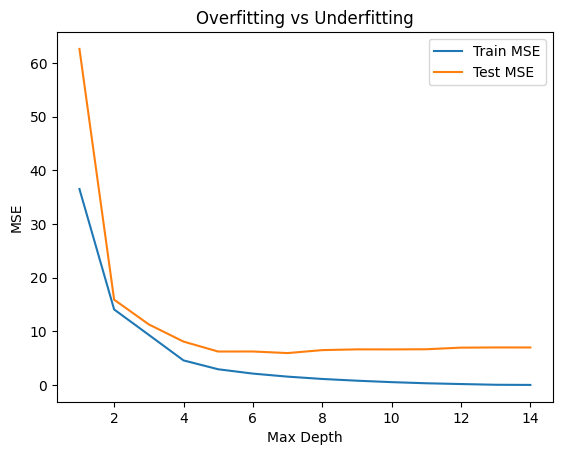

In [9]:
train_errors, test_errors = [], []

for depth in range(1, 15):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X_train_quad, y_train_quad)
    train_errors.append(mean_squared_error(y_train_quad, tree.predict(X_train_quad)))
    test_errors.append(mean_squared_error(y_test_quad, tree.predict(X_test_quad)))

plt.plot(range(1, 15), train_errors, label='Train MSE')
plt.plot(range(1, 15), test_errors, label='Test MSE')
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.title('Overfitting vs Underfitting')
plt.legend()
plt.show()
